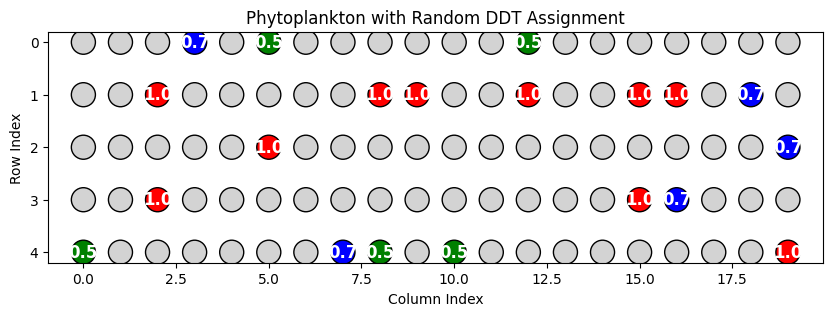

In [31]:
# %% Cell 1: Phytoplankton with Random DDT Assignment

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a 5 (rows) x 20 (columns) grid (total 100 phytoplankton)
grid_x, grid_y = np.meshgrid(np.arange(20), np.arange(5))
grid_x = grid_x.flatten()  # x-coordinates (0 to 19)
grid_y = grid_y.flatten()  # y-coordinates (0 to 4)
n = len(grid_x)  # 100

# Initialize DDT values (all start at 0)
ddt_values = np.zeros(n)

# Randomly select 20 unique indices to assign nonzero DDT values
selected_indices = np.random.choice(n, size=20, replace=False)
np.random.shuffle(selected_indices)

# Assign values: 5 get 0.5 ppm, 5 get 0.7 ppm, 10 get 1.0 ppm.
ddt_values[selected_indices[:5]]   = 0.5
ddt_values[selected_indices[5:10]] = 0.7
ddt_values[selected_indices[10:]]  = 1.0

# Choose colors based on DDT value:
# 0 ppm -> 'lightgray', 0.5 ppm -> 'green', 0.7 ppm -> 'blue', 1.0 ppm -> 'red'
colors = []
for val in ddt_values:
    if np.isclose(val, 0):
        colors.append('lightgray')
    elif np.isclose(val, 0.5):
        colors.append('green')
    elif np.isclose(val, 0.7):
        colors.append('blue')
    elif np.isclose(val, 1.0):
        colors.append('red')
    else:
        colors.append('black')

# Plot the phytoplankton grid.
plt.figure(figsize=(10, 3))
plt.scatter(grid_x, grid_y, s=300, c=colors, edgecolors='k')
plt.gca().invert_yaxis()  # so that row 0 is at the top
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Phytoplankton with Random DDT Assignment')

# Annotate nonzero DDT values on the circles.
for i in range(n):
    if ddt_values[i] != 0:
        plt.text(grid_x[i], grid_y[i], f"{ddt_values[i]:.1f}",
                 color='white', ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()

# (After running, the variables grid_x, grid_y, ddt_values, and colors remain in the workspace.)


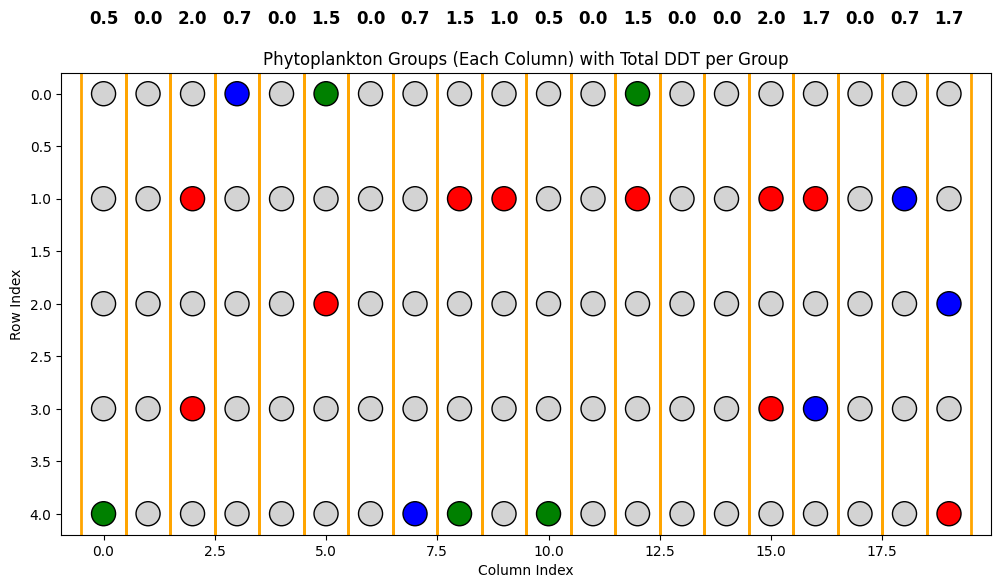

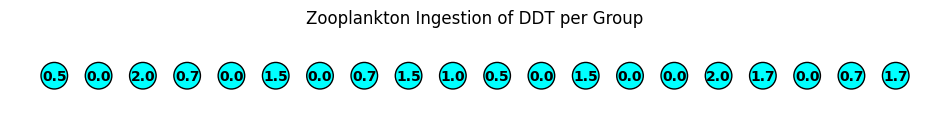

In [32]:
# %% Cell 2: Zooplankton Ingestion from Phytoplankton Groups

import matplotlib.pyplot as plt
import matplotlib.patches as patches

num_columns = 20  # There are 20 columns, so 20 groups
group_sums = []   # To store the total DDT for each group

# Plot the phytoplankton grid again with group boundaries and group DDT sums.
plt.figure(figsize=(12, 6))
ax = plt.gca()
plt.scatter(grid_x, grid_y, s=300, c=colors, edgecolors='k')
plt.gca().invert_yaxis()
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Phytoplankton Groups (Each Column) with Total DDT per Group')

for col in range(num_columns):
    # Get indices for phytoplankton in the current column (group)
    indices = np.where(grid_x == col)[0]
    group_sum = np.sum(ddt_values[indices])
    group_sums.append(group_sum)
    
    # Draw a rectangle around the group: spanning x from col-0.5 to col+0.5 and y from -0.5 to 4.5
    rect = patches.Rectangle((col - 0.5, -0.5), 1, 5, linewidth=2,
                             edgecolor='orange', facecolor='none')
    ax.add_patch(rect)
    
    # Annotate the group with the total DDT value (placed below the group)
    plt.text(col, -0.8, f'{group_sum:.1f}', ha='center', va='top',
             fontsize=12, color='black', fontweight='bold')

plt.show()

# Save the zooplankton ingestion values for later steps.
# Each column (group) represents one zooplankton's DDT ingestion.
zooplankton_ddt = np.array(group_sums)

# Now, plot 20 zooplankton as circles with their ingested DDT.
plt.figure(figsize=(12, 2))
ax2 = plt.gca()
for col in range(num_columns):
    # Draw a circle (representing a zooplankton) at position (col, 0)
    circle = patches.Circle((col, 0), radius=0.3, edgecolor='black', facecolor='cyan')
    ax2.add_patch(circle)
    # Annotate the circle with the ingested DDT value from that group.
    plt.text(col, 0, f'{zooplankton_ddt[col]:.1f}', ha='center', va='center',
             fontsize=10, color='black', fontweight='bold')

plt.xlim(-1, num_columns)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title('Zooplankton Ingestion of DDT per Group')
plt.show()

# (Variables zooplankton_ddt now holds the DDT ingested by each of the 20 zooplankton.)


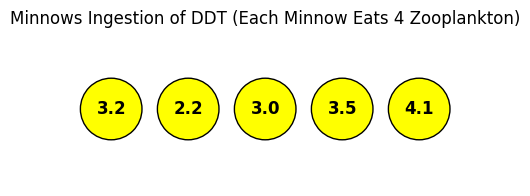

In [33]:
# %% Cell 3: Minnows Ingestion from Zooplankton

# There are 20 zooplankton; group them into 5 groups (each group = 4 zooplankton)
num_minnows = 5
minnow_ddt = []  # List to store total DDT ingested by each minnow

# Group the zooplankton ingestion values (zooplankton_ddt) into 5 groups.
for i in range(num_minnows):
    # Group i: zooplankton from indices 4*i to 4*i+3
    group = zooplankton_ddt[4*i:4*i+4]
    minnow_ddt.append(np.sum(group))

minnow_ddt = np.array(minnow_ddt)

# Plot 5 minnows as circles with their ingested DDT amounts.
plt.figure(figsize=(8, 2))
ax3 = plt.gca()
for i in range(num_minnows):
    # Draw a circle (representing a minnow) at position (i, 0)
    circle = patches.Circle((i, 0), radius=0.4, edgecolor='black', facecolor='yellow')
    ax3.add_patch(circle)
    # Annotate the circle with the ingested DDT value.
    plt.text(i, 0, f'{minnow_ddt[i]:.1f}', ha='center', va='center',
             fontsize=12, color='black', fontweight='bold')

plt.xlim(-1, num_minnows)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title('Minnows Ingestion of DDT (Each Minnow Eats 4 Zooplankton)')
plt.show()

# (minnow_ddt now contains the DDT ingested by each of the 5 minnows.)


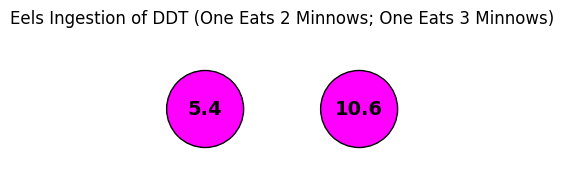

In [34]:
# %% Cell 4: Eels Ingestion from Minnows

# There are 5 minnows. We'll assume:
#   - Eel 1 eats the first 2 minnows.
#   - Eel 2 eats the remaining 3 minnows.
eel1_ddt = np.sum(minnow_ddt[:2])
eel2_ddt = np.sum(minnow_ddt[2:])

# Plot 2 eels as rectangles or circles. Here, we'll use circles.
plt.figure(figsize=(6, 2))
ax4 = plt.gca()

# Draw eel 1
eel1 = patches.Circle((0, 0), radius=0.5, edgecolor='black', facecolor='magenta')
ax4.add_patch(eel1)
plt.text(0, 0, f'{eel1_ddt:.1f}', ha='center', va='center', fontsize=14, fontweight='bold')

# Draw eel 2
eel2 = patches.Circle((2, 0), radius=0.5, edgecolor='black', facecolor='magenta')
ax4.add_patch(eel2)
plt.text(2, 0, f'{eel2_ddt:.1f}', ha='center', va='center', fontsize=14, fontweight='bold')

plt.xlim(-1, 3)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title('Eels Ingestion of DDT (One Eats 2 Minnows; One Eats 3 Minnows)')
plt.show()

# (eel1_ddt and eel2_ddt now hold the total DDT for each eel.)


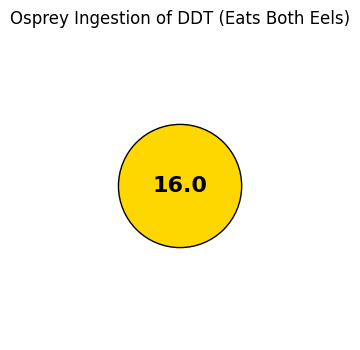

In [35]:
# %% Cell 5: Osprey Ingestion from Eels

# The osprey ingests the total DDT from both eels.
osprey_ddt = eel1_ddt + eel2_ddt

# Plot the osprey as a large circle (or any other marker) with the ingested DDT value.
plt.figure(figsize=(4, 4))
ax5 = plt.gca()

# Draw an osprey (using a circle for simplicity)
osprey = patches.Circle((0, 0), radius=0.8, edgecolor='black', facecolor='gold')
ax5.add_patch(osprey)
plt.text(0, 0, f'{osprey_ddt:.1f}', ha='center', va='center', fontsize=16, fontweight='bold')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title('Osprey Ingestion of DDT (Eats Both Eels)')
plt.show()

# (osprey_ddt is the total DDT ingested by the osprey.)


In [36]:
# %% Cell 6: Calculate and Display the Data Table of Average DDT per Trophic Level

import numpy as np
import pandas as pd

# Calculate total and average DDT at each trophic level.
# (These calculations assume that the total DDT is passed intact from one level to the next.)

# Phytoplankton (Primary Producers)
total_phytoplankton = np.sum(ddt_values)  # e.g., 16.0 ppm total (based on assigned values)
num_phytoplankton = 100
avg_phytoplankton = total_phytoplankton / num_phytoplankton

# Zooplankton (Primary Consumers / Herbivores)
total_zooplankton = np.sum(zooplankton_ddt)  # should equal total phytoplankton DDT (e.g., 16.0 ppm)
num_zooplankton = 20
avg_zooplankton = total_zooplankton / num_zooplankton

# Minnows (Secondary Consumers / Carnivores)
total_minnows = np.sum(minnow_ddt)  # should equal 16.0 ppm
num_minnows = 5
avg_minnows = total_minnows / num_minnows

# Eels (Tertiary Consumers)
total_eels = eel1_ddt + eel2_ddt  # should equal 16.0 ppm
num_eels = 2
avg_eels = total_eels / num_eels

# Osprey (Top Consumer)
total_osprey = osprey_ddt  # should equal 16.0 ppm
num_osprey = 1
avg_osprey = total_osprey / num_osprey

# Create a pandas DataFrame to display the results.
data = {
    'Average DDT (ppm)': [avg_phytoplankton, avg_zooplankton, avg_minnows, avg_eels, avg_osprey],
    'Trophic Level/Feeding Relationship': [
        'Primary Producer', 
        'Primary Consumer (Herbivore)', 
        'Secondary Consumer (Carnivore)', 
        'Tertiary Consumer', 
        'Top Consumer'
    ]
}

df = pd.DataFrame(data, index=['Phytoplankton', 'Zooplankton', 'Minnows', 'Eels', 'Osprey'])

print("Data Table: Average DDT Ingested at Each Trophic Level")
print(df)


Data Table: Average DDT Ingested at Each Trophic Level
               Average DDT (ppm) Trophic Level/Feeding Relationship
Phytoplankton               0.16                   Primary Producer
Zooplankton                 0.80       Primary Consumer (Herbivore)
Minnows                     3.20     Secondary Consumer (Carnivore)
Eels                        8.00                  Tertiary Consumer
Osprey                     16.00                       Top Consumer


Data Table: Average DDT Ingested at Each Trophic Level
               Average DDT (ppm)  Population            Feeding Relationship
Phytoplankton               0.16         100                Primary Producer
Zooplankton                 0.80          20    Primary Consumer (Herbivore)
Minnows                     3.20           5  Secondary Consumer (Carnivore)
Eels                        8.00           2               Tertiary Consumer
Osprey                     16.00           1                    Top Consumer



Column A Calculations (Average DDT per Individual):
Phytoplankton: Total DDT = (5*0.5 + 5*0.7 + 10*1.0) = 16.0 ppm; 
    Average = 16.0 ppm / 100 = 0.16 ppm.
Zooplankton:   Average = 16.0 ppm / 20 = 0.80 ppm.
Minnows:       Average = 16.0 ppm / 5  = 3.20 ppm.
Eels:          Average = 16.0 ppm / 2  = 8.00 ppm.
Osprey:        Average = 16.0 ppm / 1  = 16.00 ppm.


Column B (Feeding Relationships):
Phytoplankton are labeled as "Primary Producer".
Zooplankton are labeled as "Prim

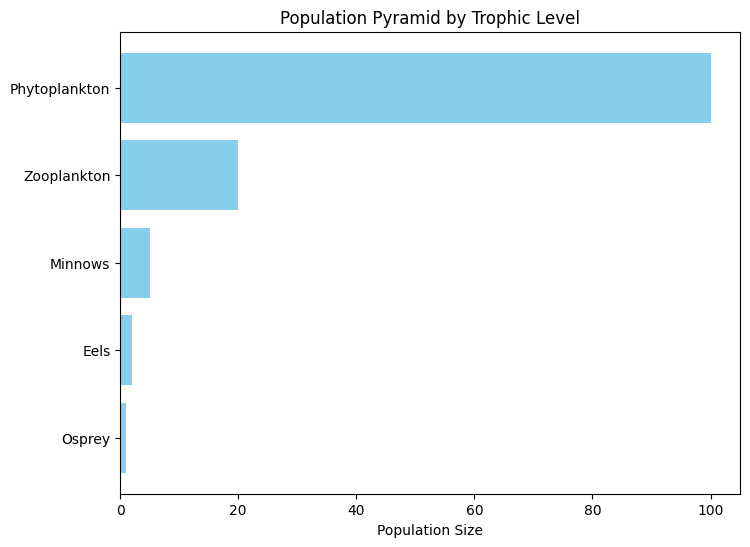

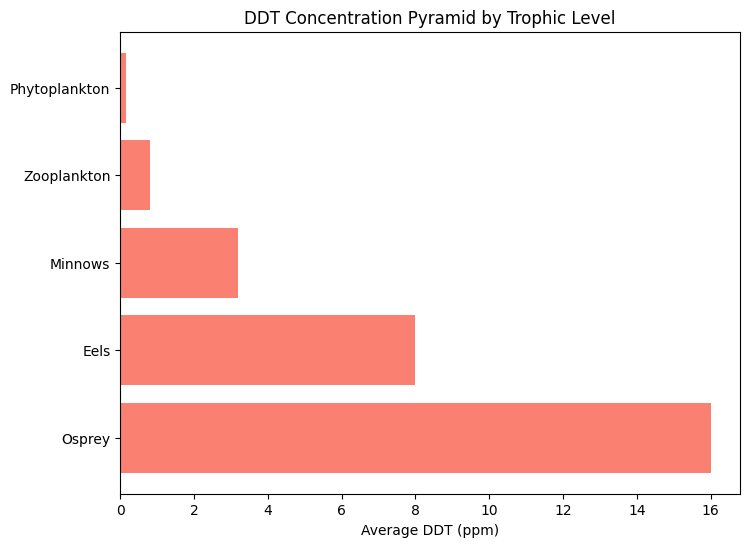

Summary of Data Trends:

a. The average DDT in one phytoplankton is 0.16 ppm.
   The average DDT in the top consumer (osprey) is 16.00 ppm.
   This is a 100.0-fold increase in toxin concentration from phytoplankton to osprey.

Analysis Paragraph:

The population pyramid clearly shows a bottom-heavy structure: a vast number of phytoplankton (100) support a much 
smaller number of higher-level consumers (20 zooplankton, 5 minnows, 2 eels, and 1 osprey). Conversely, the DDT 
concentration pyramid exhibits a dramatic increase in toxin levels with each successive trophic level. While 
phytoplankton contain only 0.16 ppm of DDT on average, this concentration rises to 16.0 ppm in the osprey – a 
100-fold increase. This stark contrast demonstrates the process of biomagnification, where even a small amount of 
toxin present in the abundant primary producers becomes highly concentrated in the top predator. The shapes of the 
two pyramids, one showing a decrease in organism numbers and the other 

In [30]:
# %% Cell 7: Data Analysis - Data Table, Pyramid Graphs, and Summary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# PART 1: Data Table and Calculations
# ---------------------------

# For demonstration, we'll use these example values.
# (Replace these with your actual values if available.)
populations = [100, 20, 5, 2, 1]
avg_phytoplankton = 16.0 / 100   # 0.16 ppm
avg_zooplankton   = 16.0 / 20    # 0.80 ppm
avg_minnows       = 16.0 / 5     # 3.20 ppm
avg_eels          = 16.0 / 2     # 8.00 ppm
avg_osprey        = 16.0         # 16.00 ppm

# Create a DataFrame for the data table.
data = {
    'Average DDT (ppm)': [avg_phytoplankton, avg_zooplankton, avg_minnows, avg_eels, avg_osprey],
    'Population': populations,
    'Feeding Relationship': [
        'Primary Producer', 
        'Primary Consumer (Herbivore)', 
        'Secondary Consumer (Carnivore)', 
        'Tertiary Consumer', 
        'Top Consumer'
    ]
}
df = pd.DataFrame(data, index=['Phytoplankton', 'Zooplankton', 'Minnows', 'Eels', 'Osprey'])

print("Data Table: Average DDT Ingested at Each Trophic Level")
print(df)
print("\n")

# --- Column A Calculations ---
calc_col_A = """
Column A Calculations (Average DDT per Individual):
Phytoplankton: Total DDT = (5*0.5 + 5*0.7 + 10*1.0) = 16.0 ppm; 
    Average = 16.0 ppm / 100 = 0.16 ppm.
Zooplankton:   Average = 16.0 ppm / 20 = 0.80 ppm.
Minnows:       Average = 16.0 ppm / 5  = 3.20 ppm.
Eels:          Average = 16.0 ppm / 2  = 8.00 ppm.
Osprey:        Average = 16.0 ppm / 1  = 16.00 ppm.
"""
print(calc_col_A)

# --- Column B Calculations ---
calc_col_B = """
Column B (Feeding Relationships):
Phytoplankton are labeled as "Primary Producer".
Zooplankton are labeled as "Primary Consumer (Herbivore)".
Minnows are labeled as "Secondary Consumer (Carnivore)".
Eels are labeled as "Tertiary Consumer".
Osprey are labeled as "Top Consumer".
"""
print(calc_col_B)

# ---------------------------
# PART 2: Pyramid Graphs
# ---------------------------

levels = ['Phytoplankton', 'Zooplankton', 'Minnows', 'Eels', 'Osprey']

# Population Pyramid: Horizontal bar chart for population numbers.
plt.figure(figsize=(8,6))
plt.barh(levels, populations, color='skyblue')
plt.xlabel("Population Size")
plt.title("Population Pyramid by Trophic Level")
plt.gca().invert_yaxis()  # Display the top consumer at the top
plt.show()

# DDT Concentration Pyramid: Horizontal bar chart for average DDT concentrations.
plt.figure(figsize=(8,6))
plt.barh(levels, [avg_phytoplankton, avg_zooplankton, avg_minnows, avg_eels, avg_osprey], color='salmon')
plt.xlabel("Average DDT (ppm)")
plt.title("DDT Concentration Pyramid by Trophic Level")
plt.gca().invert_yaxis()
plt.show()

# ---------------------------
# PART 3: Summary of Data Trends
# ---------------------------

# (a) Compare DDT in the osprey vs. one phytoplankton:
ratio = avg_osprey / avg_phytoplankton

print("Summary of Data Trends:\n")
print("a. The average DDT in one phytoplankton is {:.2f} ppm.".format(avg_phytoplankton))
print("   The average DDT in the top consumer (osprey) is {:.2f} ppm.".format(avg_osprey))
print("   This is a {:.1f}-fold increase in toxin concentration from phytoplankton to osprey.\n".format(ratio))

# (b) Analysis Paragraph:
analysis_paragraph = """
The population pyramid clearly shows a bottom-heavy structure: a vast number of phytoplankton (100) support a much 
smaller number of higher-level consumers (20 zooplankton, 5 minnows, 2 eels, and 1 osprey). Conversely, the DDT 
concentration pyramid exhibits a dramatic increase in toxin levels with each successive trophic level. While 
phytoplankton contain only 0.16 ppm of DDT on average, this concentration rises to 16.0 ppm in the osprey – a 
100-fold increase. This stark contrast demonstrates the process of biomagnification, where even a small amount of 
toxin present in the abundant primary producers becomes highly concentrated in the top predator. The shapes of the 
two pyramids, one showing a decrease in organism numbers and the other an increase in toxin concentration, are 
consistent with known food chain dynamics and the biomagnification phenomenon observed in ecosystems.
"""
print("Analysis Paragraph:")
print(analysis_paragraph)
